# Section 2: User Segmentation
#Problem Statement: Segment users based on their advertisement behaviors and characteristics.

# Tasks:
## 1.	Data Preprocessing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [4]:
df.shape

(258888, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

## Handle missing values.

In [6]:
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [7]:
df.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [8]:
# Drop less relevant columns
columns_to_drop = ['ad_title', 'ad_description', 'details', 'slug', 'title', 'properties']
df = df.drop(columns=columns_to_drop)

In [9]:
# Display the first few rows of the dataframe to verify the changes
print(df.head())

       type      price        timestamp                posted_date  \
0  for_sale  Rs 18,000  23 Feb 11:35 pm  2023-02-23T23:35:10+05:30   
1  for_sale  Rs 67,000   23 Feb 8:32 am  2023-02-23T08:32:44+05:30   
2  for_sale  Rs 85,000   01 Dec 8:27 pm  2022-12-01T20:27:49+05:30   
3  for_sale  Rs 47,000   04 Dec 2:47 pm  2022-12-04T14:47:27+05:30   
4  for_sale   Rs 9,000   08 Dec 9:28 am  2022-12-08T09:28:04+05:30   

          deactivation_date                  category parent_category  \
0  2022-05-30T17:13:04.000Z  Auto Parts & Accessories        Vehicles   
1  2022-03-31T16:27:59.000Z  Auto Parts & Accessories        Vehicles   
2  2022-03-31T14:03:57.000Z  Auto Parts & Accessories        Vehicles   
3  2022-07-29T13:22:59.000Z  Auto Parts & Accessories        Vehicles   
4  2022-07-29T12:55:44.000Z  Auto Parts & Accessories        Vehicles   

     location geo_region                             area  is_delivery_free  \
0  Maharagama      LK-11  {'id': 1506, 'name': 'Colombo'}    

In [10]:
# Check for any remaining missing values
print(df.isnull().sum())

type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
user                         0
dtype: int64


In [11]:
df.dtypes

type                    object
price                   object
timestamp               object
posted_date             object
deactivation_date       object
category                object
parent_category         object
location                object
geo_region              object
area                    object
is_delivery_free          bool
is_doorstep_delivery      bool
is_dsd_applicable         bool
is_member               object
is_authorized_dealer    object
is_featured_member      object
is_verified               bool
membership_level        object
member_since            object
user                    object
dtype: object

In [12]:
df.isnull().sum()

type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
user                         0
dtype: int64

In [13]:
df['price'] = df['price'].astype(str)

# Initialize a counter for non-numeric values
non_numeric_count = 0

# Function to clean and convert the price column
def clean_price(price_str):
    global non_numeric_count
    try:
        # Remove 'Rs ' and commas
        clean_str = price_str.replace('Rs ', '').replace(',', '')
        # Convert to float
        return float(clean_str)
    except ValueError:
        # If conversion fails, increment the counter and return NaN
        non_numeric_count += 1
        return np.nan

# Apply the function to the price column
df['price'] = df['price'].apply(clean_price)

# Output the count of non-numeric values
print(f"Count of non-numeric values: {non_numeric_count}")


Count of non-numeric values: 1673


In [14]:
median_value = df['price'].median()
print(f"Median value of 'price' column: {median_value}")

# Fill missing values in the 'price' column with the median value
df['price'].fillna(median_value, inplace=True)

# Print the DataFrame after filling missing values
print("DataFrame after filling missing values in 'price' column:")
df

Median value of 'price' column: 285000.0
DataFrame after filling missing values in 'price' column:


,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,user
0,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,for_sale,1030000.0,01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,Cars,Vehicles,Jaffna City,LK-41,"{'id': 1605, 'name': 'Jaffna'}",False,False,False,False,False,False,False,free,NaN,48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,for_sale,3550000.0,30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,Cars,Vehicles,Battaramulla,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,NaN,c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,for_sale,70000.0,01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,Rentals,Vehicles,Colombo 3,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,NaN,c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,for_sale,7250000.0,01 Apr 11:40 am,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,Cars,Vehicles,Boralesgamuwa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,premium,December 2019,7c6477247c19fa63845687656fee40702da46c9d184568...


In [15]:
df.isnull().sum()

type                         0
price                        0
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
user                         0
dtype: int64

In [16]:
df.dropna(subset=['timestamp','posted_date','deactivation_date'], inplace = True)

In [17]:
df.isnull().sum()

type                         0
price                        0
timestamp                    0
posted_date                  0
deactivation_date            0
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9049
is_authorized_dealer      9049
is_featured_member        9049
is_verified                  0
membership_level             0
member_since            150250
user                         0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['is_member']] = imputer.fit_transform(df[['is_member']])
df[['is_authorized_dealer']] = imputer.fit_transform(df[['is_authorized_dealer']])
df[['is_featured_member']] = imputer.fit_transform(df[['is_featured_member']])
df[['member_since']] = imputer.fit_transform(df[['member_since']])

In [19]:
df.isnull().sum()

type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
member_since            0
user                    0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

# Assume df is your DataFrame
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'bool' or df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

print(df.head())


   type    price  timestamp  posted_date  deactivation_date  category  \
0     0  18000.0      85997       204106               2513         0   
1     0  67000.0      86564       202591               1512         0   
2     0  85000.0       1362        68544               1511         0   
3     0  47000.0      14158        73848               3441         0   
4     0   9000.0      31514        79969               3440         0   

   parent_category  location  geo_region  area  is_delivery_free  \
0                0       127           1     4                 0   
1                0       120           1     4                 0   
2                0       120           1     4                 0   
3                0       119           1     4                 0   
4                0       119           1     4                 0   

   is_doorstep_delivery  is_dsd_applicable  is_member  is_authorized_dealer  \
0                     0                  0          1                    

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca_df.head())



        PC1       PC2
0  3.718706  0.418893
1  2.649769  0.471039
2  2.482213  1.716147
3  1.185420  1.635002
4  1.207925  1.586967


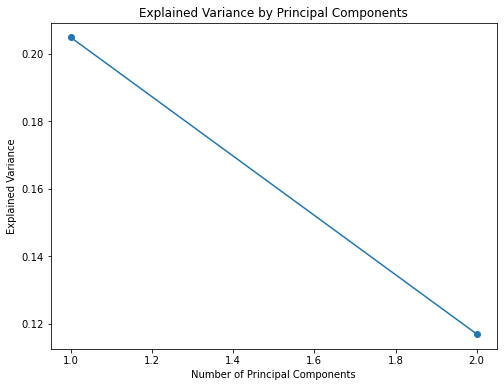

In [22]:
# Visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [23]:
#Select Relevant Features for Clustering:
# Assuming PCA is necessary, we use the principal components
data_for_clustering = pca_df
# If PCA is not used, select the original features you deem relevant

## Step 3: Clustering
Apply

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_for_clustering)
    distortions.append(kmeans.inertia_)


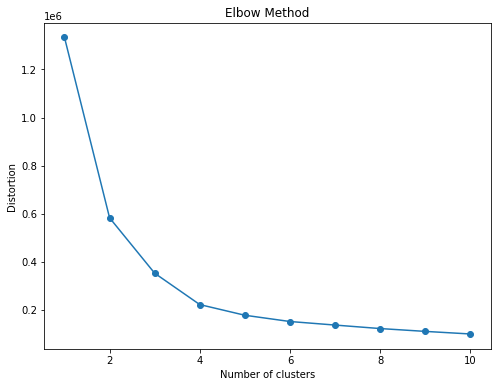

In [25]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()



In [29]:
# Apply K-means with the chosen number of clusters
optimal_clusters = 4  # Example: Choose based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(data_for_clustering)
df['Cluster'] = kmeans.labels_

## Step 4: Cluster Analysis

#1. Interpret and Describe the Characteristics of Each Cluster

In [30]:
# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_

# Group data by clusters and calculate mean values for each feature
cluster_summary = df.groupby('Cluster').mean()

print(cluster_summary)

             type         price     timestamp    posted_date  \
Cluster                                                        
0        0.000021  2.306923e+06  57537.222502  190653.037674   
1        0.000000  2.578163e+06  56591.650231   82216.354666   
2        0.005738  1.827608e+06  53065.632592   61696.365202   
3        0.008760  1.752021e+06  55602.771903  186907.452019   

         deactivation_date  category  parent_category    location  geo_region  \
Cluster                                                                         
0            190120.792397  3.428910              0.0  106.880851    1.976670   
1             57859.433960  3.223403              0.0  109.646247    1.867532   
2             72860.576030  6.167623              0.0  104.060757    5.682029   
3            194730.842860  6.025262              0.0  104.128992    5.777804   

             area  is_delivery_free  is_doorstep_delivery  is_dsd_applicable  \
Cluster                                         

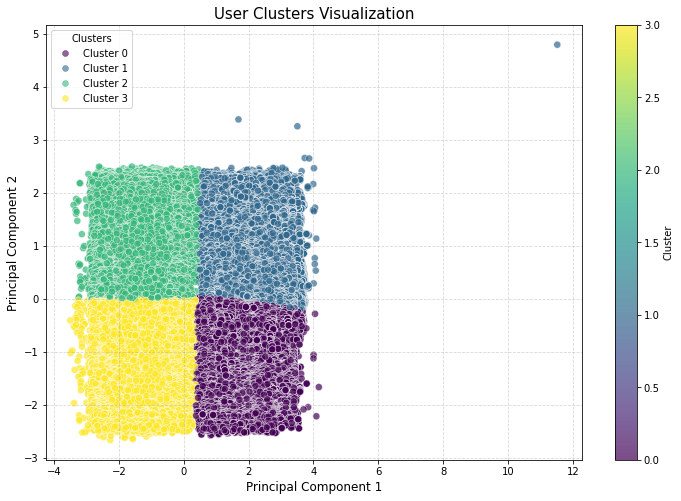

In [31]:
# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_for_clustering['PC1'], data_for_clustering['PC2'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('User Clusters Visualization', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend with cluster numbers
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend = plt.legend(handles, [f'Cluster {i}' for i in range(optimal_clusters)], title="Clusters", loc="best")

plt.show()


### Interpret and describe the characteristics of each cluster.

In [36]:
df.groupby('Cluster').agg(['mean']).reset_index()['price']

,mean
0,2.306923e+06
1,2.578163e+06
2,1.827608e+06
3,1.752021e+06


### Identify any patterns or insights about user behavior.

    Insights
    Clusters Overview:

    Cluster 0: Contains second highest values with a mean around 2.30 million. This cluster contain vehicles 
    with expensive price
    Cluster 1: Contains higher values with a mean around 2.57 million. This cluster contains the most expensive vehicles
    Cluster 2: Contains higher values with a mean around 1.82 million. This cluster contains medium price vehicles
    Cluster 3: Contains higher values with a mean around 1.75 million. This cluster contains cheap vehicle 
    compared to other clusters

    User Behavior Patterns:

    Cluster 0: Could represent a group of users or activities with higher engagement or revenue.
    Cluster 1: Could represent a group of users or activities with Highest engagement or revenue. 
    Cluster 2: Could represent a group of users or activities with Middle engagement or revenue. 
    Cluster 3: Could represent a group of users or activities with lower engagement or revenue. 

    
